In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math

from typing import Tuple, List, Dict

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
from src.format_figures import format_figure_2d, format_figure_contour_2d, format_figure_3d
from src.function_figure import FunctionFigure
from src.quadratic_figure import Quadratic

# Test functions

## Quadratic function

OK


TypeError: Quadratic.function() missing 1 required positional argument: 'gamma'

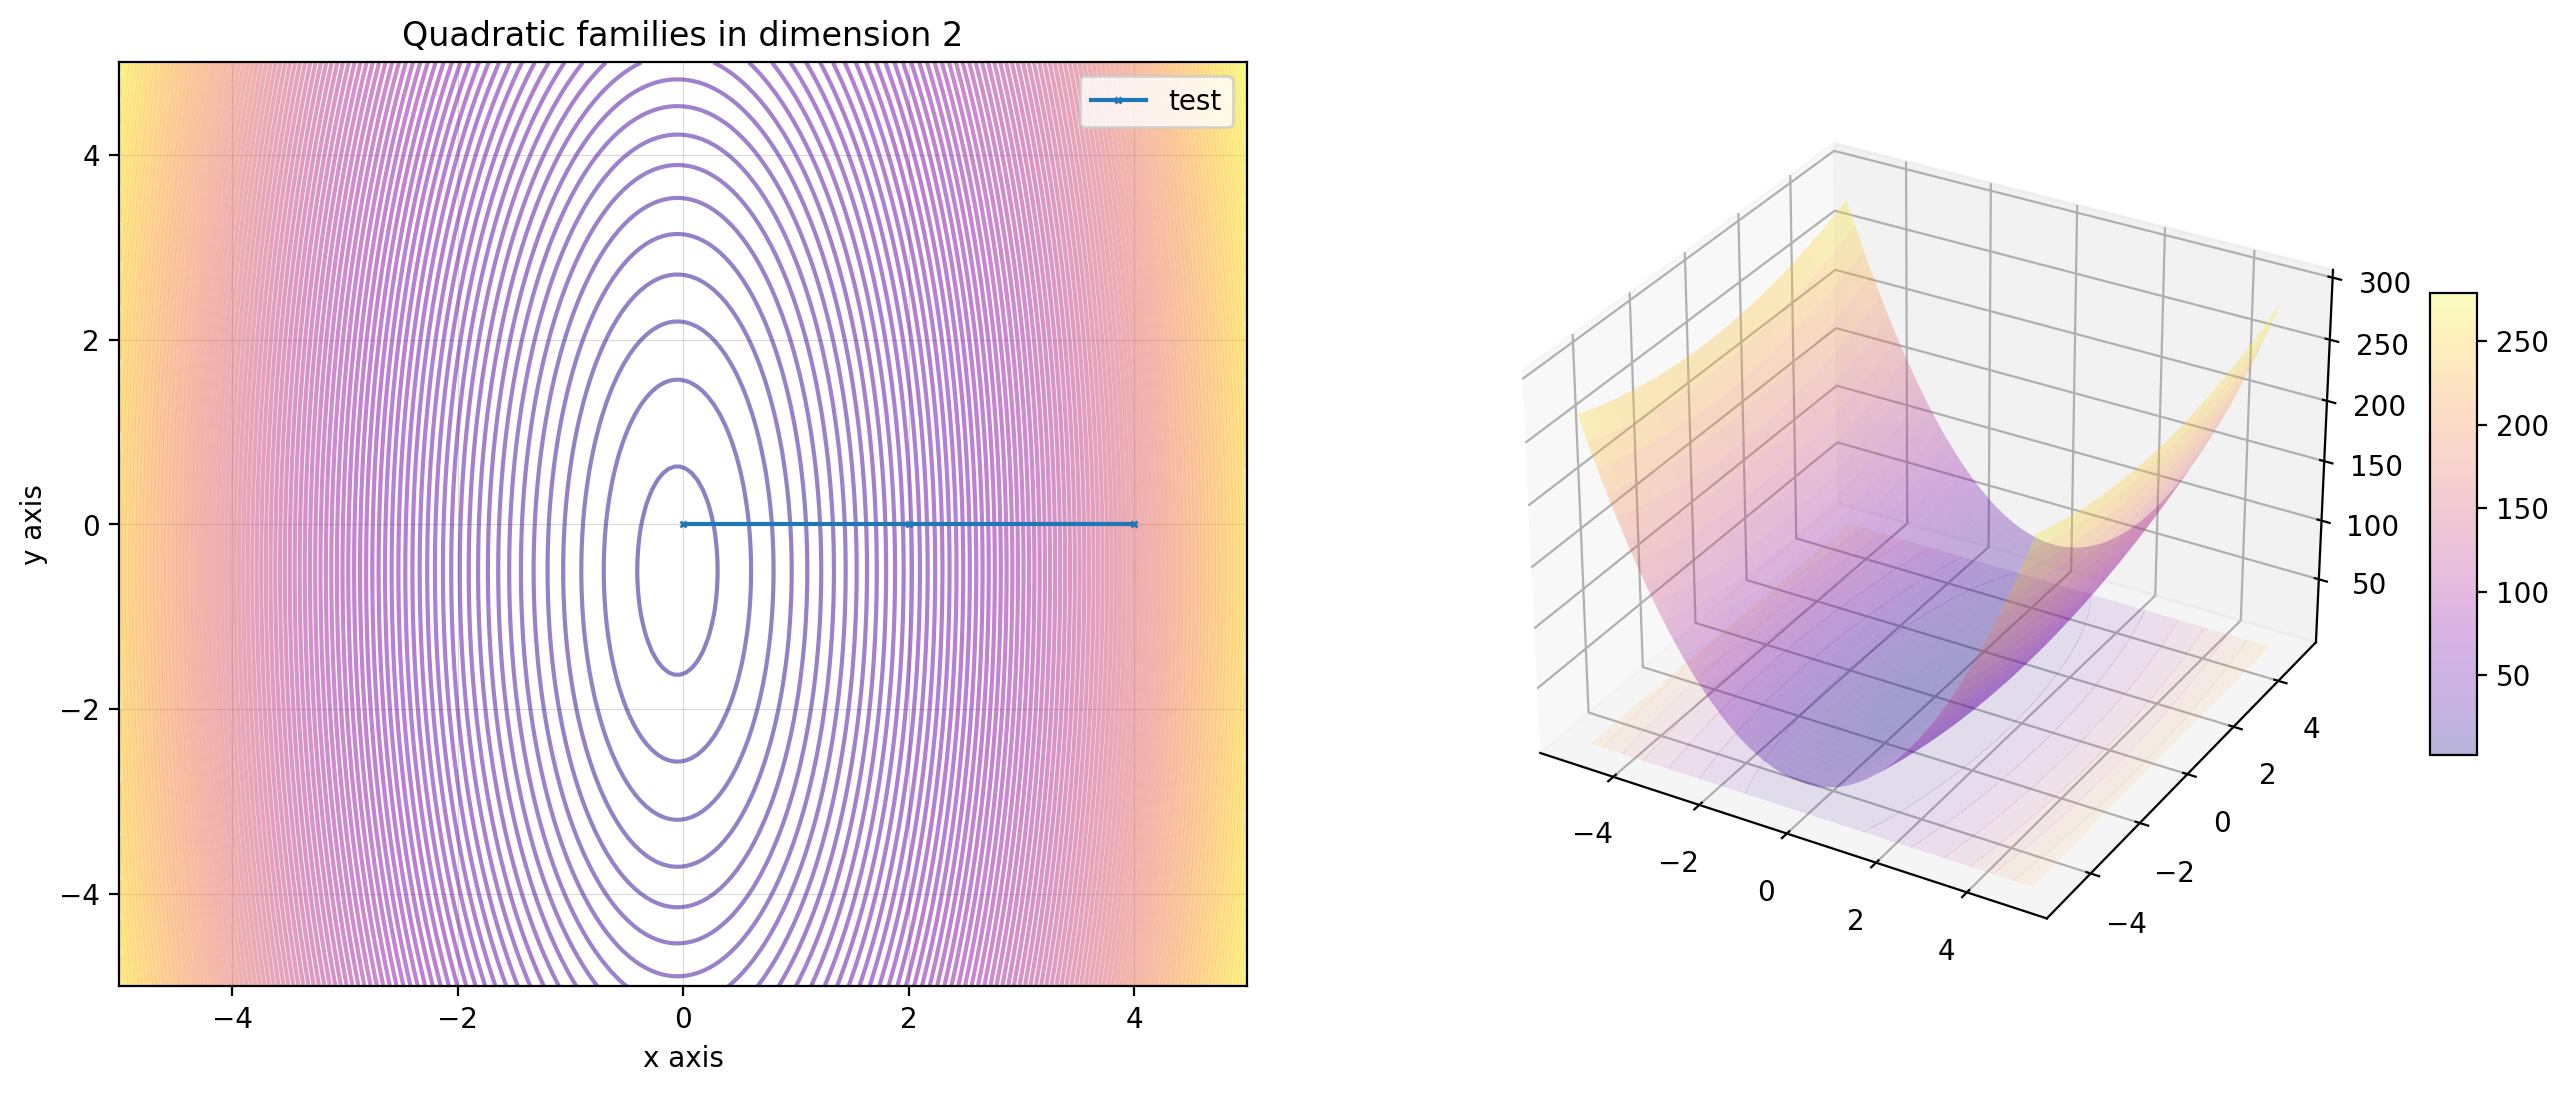

In [12]:
func_2d_params = {
    "x": np.linspace(-5, 5, 400),
    "gamma_range": range(5, 50, 5)
}
figu_2d_params = {
    "title": "Quadratic families in dimension 1",
    "y_lim": (-1, 100)
}

X, Y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
func_3d_params = {
    "X": X,
    "Y": Y,
    "gamma": np.array([10, 1])
}
figu_3d_params = {
    "title": "Quadratic families in dimension 2",
    "view": (20, 110)
}

descent = {
    "test": np.array([[4, 0], [2, 0], [0, 0]])
}

quadratic = Quadratic()
# quadratic.figure_2d(func_2d_params, figu_2d_params)
quadratic.figure_contour(func_3d_params, figu_3d_params, descent)
# quadratic.figure_3d(func_3d_params, figu_3d_params)
quadratic.figures(func_2d_params, figu_2d_params, func_3d_params, figu_3d_params)

## Cubic function

In [6]:
class Cubic(FunctionFigure):
    def function(self, x: np.array, gamma: float) -> np.array:
        return x**3 + gamma * x**2 + x + 1

    def plot_ax_2d(self, ax, parameters: Dict):
        x = parameters.get('x')
        gamma_range = parameters.get('gamma_range')
        
        for gamma in gamma_range:
            ax.plot(x, self.function(x, gamma), label="Gamma: {}".format(gamma))

        return ax

    def plot_ax_contour(self, ax, parameters: Dict):
        X = parameters.get('X')
        Y = parameters.get('Y')
        gamma = parameters.get('gamma')
        
        Z = self.function(X, gamma) + self.function(Y, gamma)

        ax.contour(X, Y, Z, 100, cmap='plasma')

        return ax

    def plot_ax_3d(self, fig, ax, parameters: Dict):        
        X = parameters.get('X')
        Y = parameters.get('Y')
        gamma = parameters.get('gamma')
        
        Z = self.function(X, gamma) + self.function(Y, gamma)

        image = ax.plot_surface(X, Y, Z, linestyles="solid", alpha=0.9, cmap='plasma')
        fig.colorbar(image, shrink=0.5, aspect=10, pad=0.05)

        ax.contourf(X, Y, Z, zdir='z', offset=-2.5, cmap='plasma', alpha=0.2)

        return fig, ax

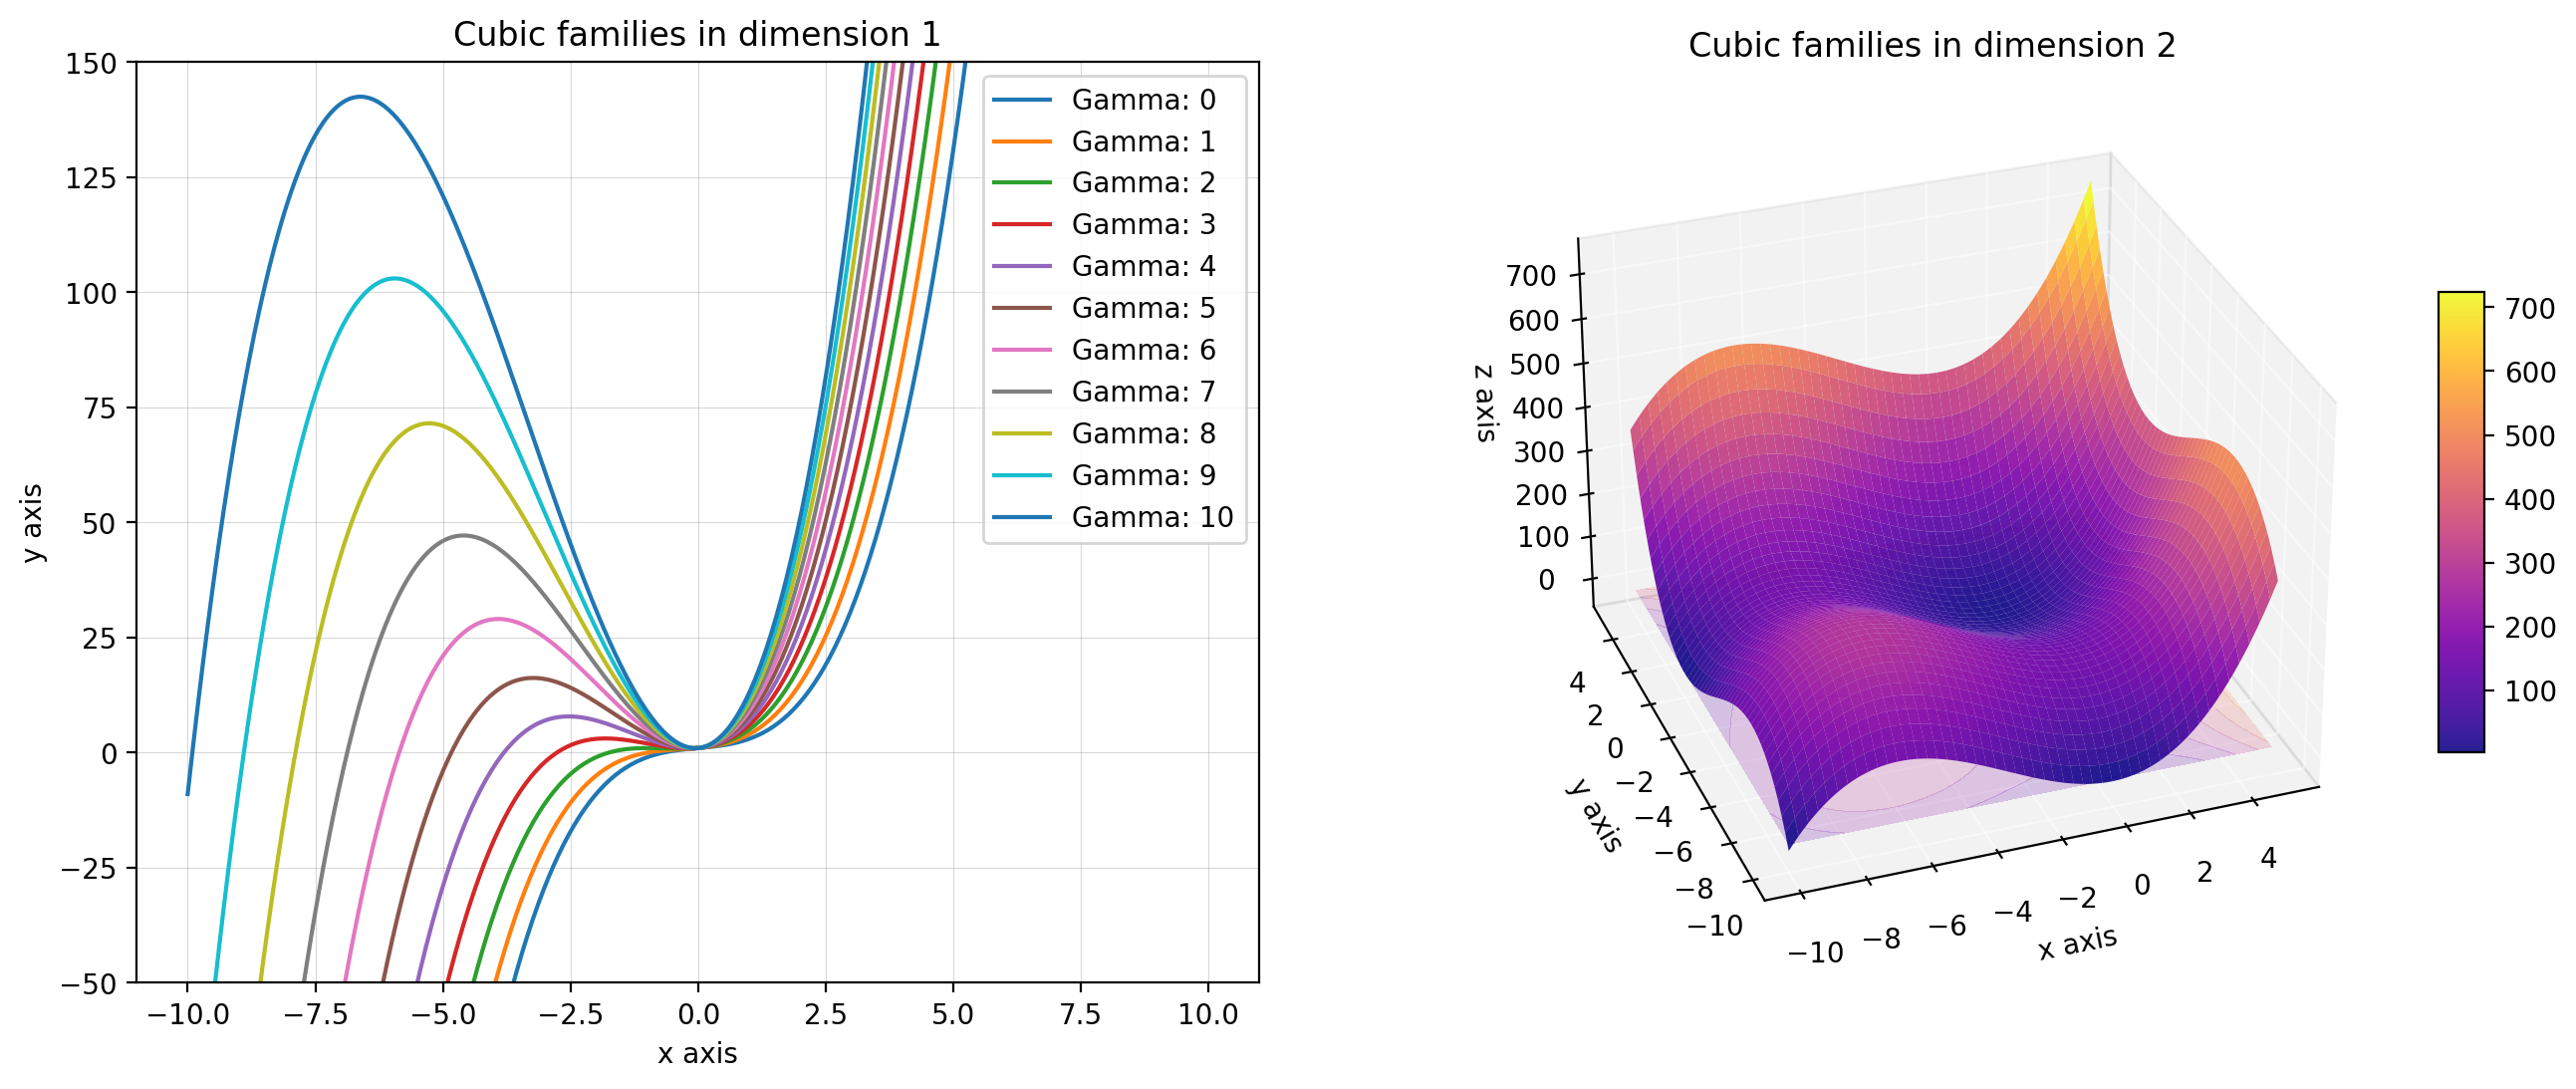

In [7]:
func_2d_params = {
    "x": np.linspace(-10, 10, 400),
    "gamma_range": range(0, 11, 1)
}
figu_2d_params = {
    "title": "Cubic families in dimension 1",
    "y_lim": (-50, 150)
}

X, Y = np.meshgrid(np.linspace(-10, 5, 200), np.linspace(-10, 5, 200))
func_3d_params = {
    "X": X,
    "Y": Y,
    "gamma": 10
}
figu_3d_params = {
    "title": "Cubic families in dimension 2",
    "view": (30, 250)
}

cubic = Cubic()
# cubic.figure_2d(func_2d_params, figu_2d_params)
# cubic.figure_3d(func_3d_params, figu_3d_params)
# cubic.figure_contour(func_3d_params, figu_3d_params)
cubic.figures(func_2d_params, figu_2d_params, func_3d_params, figu_3d_params)

## Multitrous function

In [8]:
class Multitrous(FunctionFigure):
    def function(self, x: np.array, gamma: float) -> np.array:
        return 20 * np.cos(x**2) + (gamma * x**2)

    def plot_ax_2d(self, ax, parameters: Dict):
        x = parameters.get('x')
        gamma_range = parameters.get('gamma_range')
        
        for gamma in gamma_range:
            ax.plot(x, self.function(x, gamma), label="Gamma: {}".format(gamma))

        return ax

    def plot_ax_contour(self, ax, parameters: Dict):
        X = parameters.get('X')
        Y = parameters.get('Y')
        gamma = parameters.get('gamma')
        
        Z = self.function(X, gamma[0]) + self.function(Y, gamma[1])

        ax.contour(X, Y, Z, 100, cmap='plasma')

        return ax

    def plot_ax_3d(self, fig, ax, parameters: Dict):        
        X = parameters.get('X')
        Y = parameters.get('Y')
        gamma = parameters.get('gamma')
        
        Z = self.function(X, gamma[0]) + self.function(Y, gamma[1])

        image = ax.plot_surface(X, Y, Z, linestyles="solid", alpha=0.9, cmap='plasma')
        fig.colorbar(image, shrink=0.5, aspect=10, pad=0.05)

        ax.contourf(X, Y, Z, zdir='z', offset=-2.5, cmap='plasma', alpha=0.2)

        return fig, ax

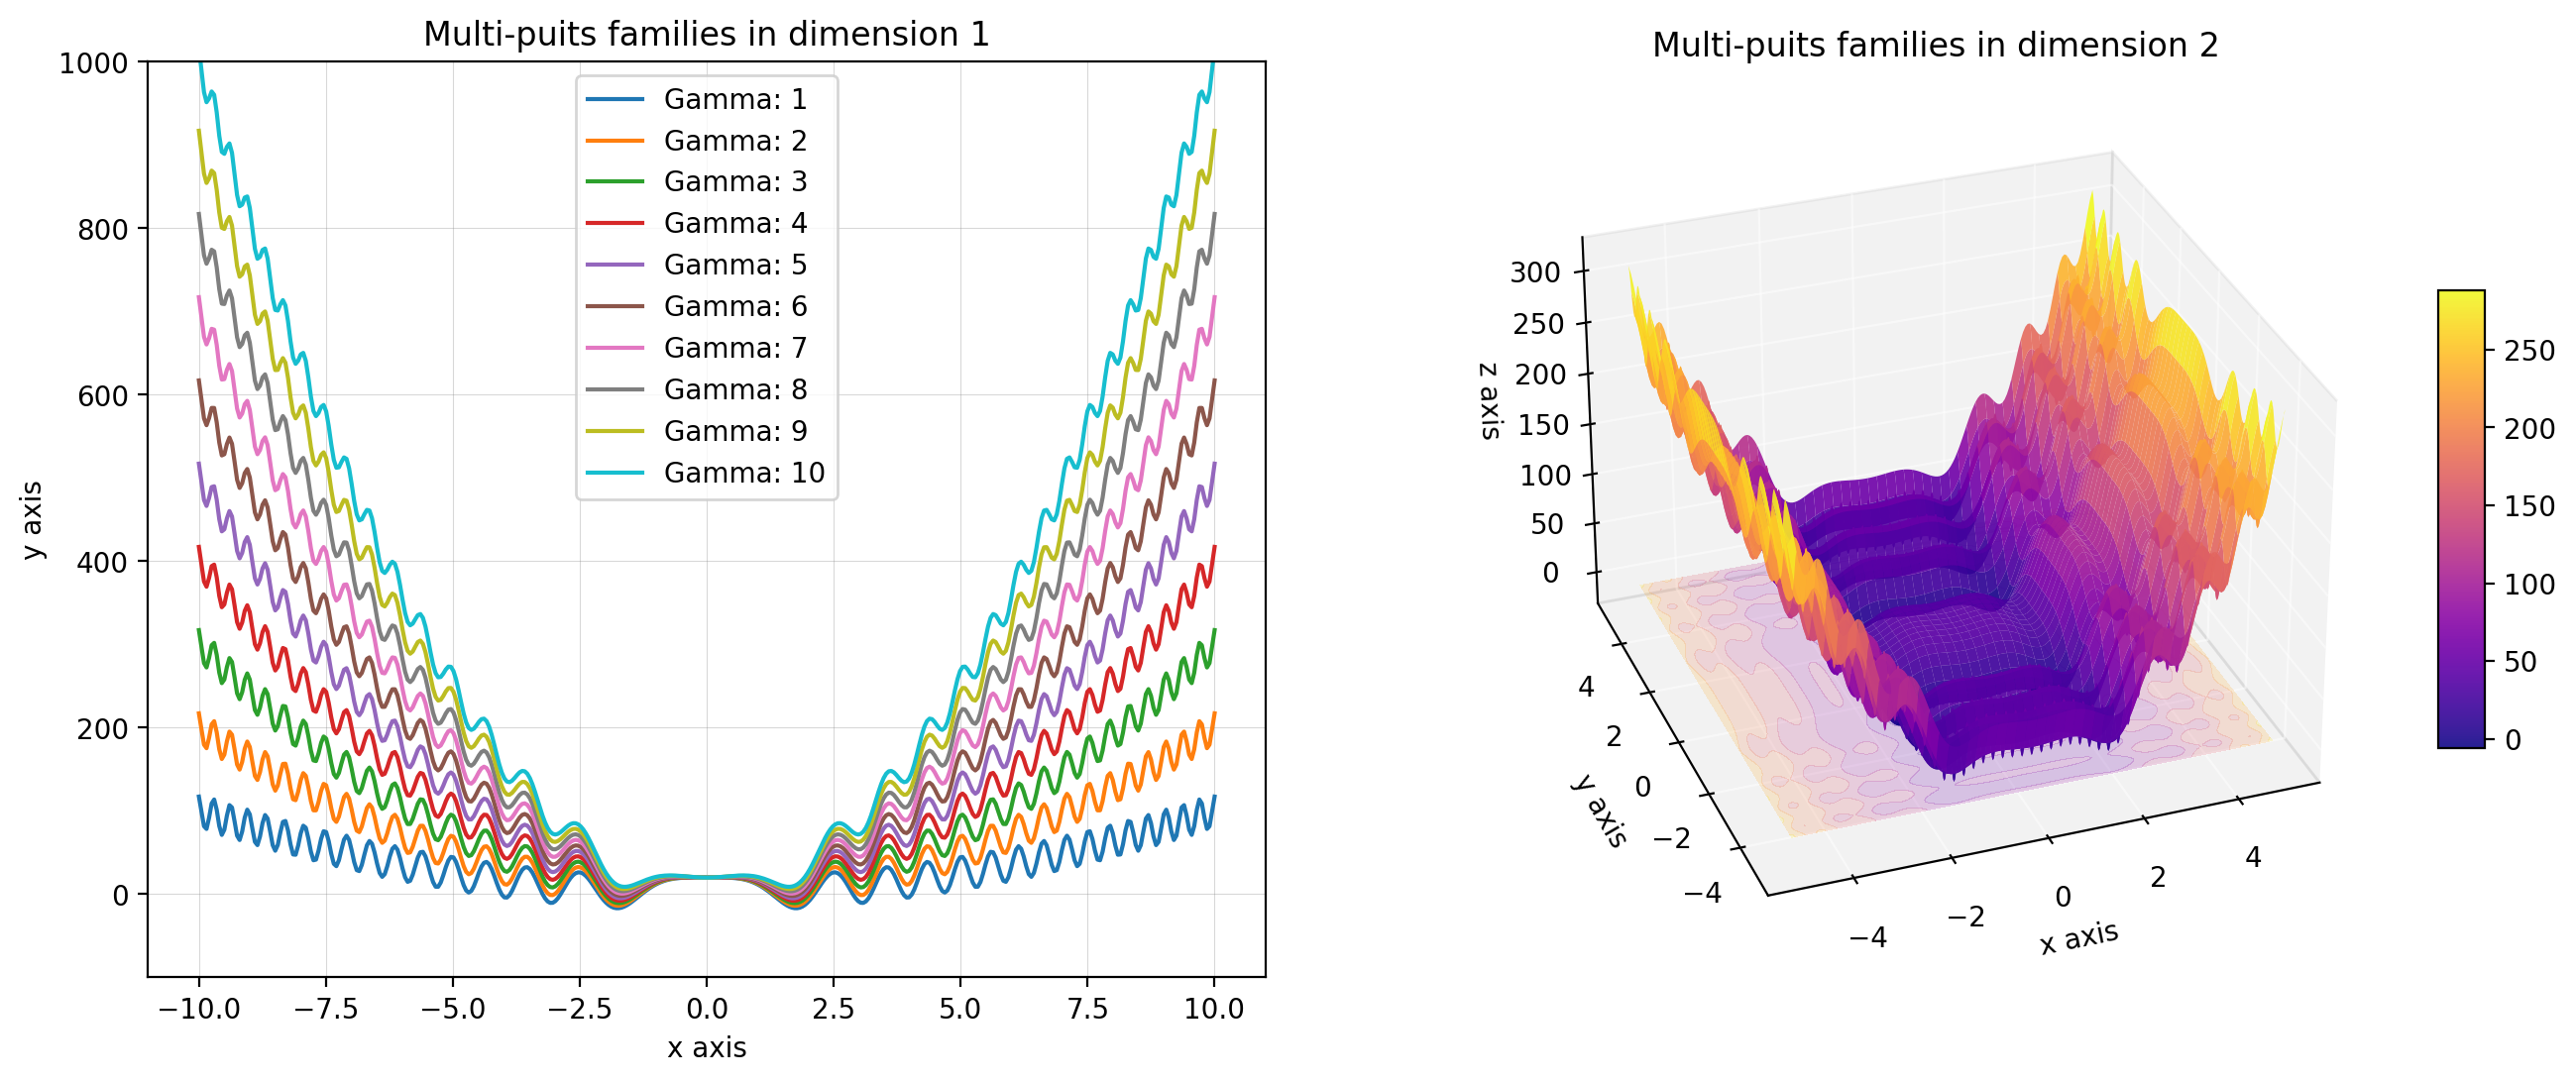

In [9]:
func_2d_params = {
    "x": np.linspace(-10, 10, 400),
    "gamma_range": range(1, 11, 1)
}
figu_2d_params = {
    "title": "Multi-puits families in dimension 1",
    "y_lim": (-100, 1000)
}

X, Y = np.meshgrid(np.linspace(-5, 5, 200) , np.linspace(-5, 5, 200) )
func_3d_params = {
    "X": X,
    "Y": Y,
    "gamma": np.array([10, 1])
}
figu_3d_params = {
    "title": "Multi-puits families in dimension 2",
    "view": (30, 250)
}

multitrous = Multitrous()
# multitrous.figure_2d(func_2d_params, figu_2d_params)
# multitrous.figure_3d(func_3d_params, figu_3d_params)
# multitrous.figure_contour(func_3d_params, figu_3d_params)
multitrous.figures(func_2d_params, figu_2d_params, func_3d_params, figu_3d_params)

In [10]:
def create_system(dim, cond: int = 10, seed: int = 100):
    np.random.seed(seed)
    cond_sqrt = math.sqrt(cond)
    
    A = 0.1 * np.random.uniform(-cond_sqrt, cond_sqrt, size=(dim,dim))
    A = np.triu(A)
    
    # on remplace la diagonale de A par des valeurs aléatoires positives entre 1 et sqrt(cond)
    A = A - np.diag(np.diag(A)) + np.diag(np.random.uniform(1., cond_sqrt, size=(dim))) 
    
    # on impose les deux premiers termes de la diagonale diagonale de A pour fixer le conditionnement
    A[0,0] = 1.
    A[1,1] = cond_sqrt
    A = A.T @ A
    
    b = 1. * np.random.randint(-10, 10, size=(dim))
    
    return A,b

In [11]:
class QuadraticN(FunctionFigure):
    def function(self, x: np.array, A: np.array, b: np.array) -> np.array:
        return (x.T @ A @ x) / 2 - b.T @ x

    def plot_ax_contour(self, ax, parameters: Dict):
        X = parameters.get('X')
        Y = parameters.get('Y')
        A = parameters.get('A')
        b = parameters.get('b')        

        Z = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i,j] = self.function(np.array([X[i,j], Y[i,j]]), A, b)

        ax.contour(X, Y, Z, 100, cmap='plasma')

        return ax

    def plot_ax_3d(self, fig, ax, parameters: Dict):        
        X = parameters.get('X')
        Y = parameters.get('Y')
        A = parameters.get('A')
        b = parameters.get('b')        

        Z = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i,j] = self.function(np.array([X[i,j], Y[i,j]]), A, b)

        image = ax.plot_surface(X, Y, Z, linestyles="solid", alpha=0.9, cmap='plasma')
        fig.colorbar(image, shrink=0.5, aspect=10, pad=0.05)

        ax.contourf(X, Y, Z, zdir='z', offset=-2.5, cmap='plasma', alpha=0.2)

        return fig, ax

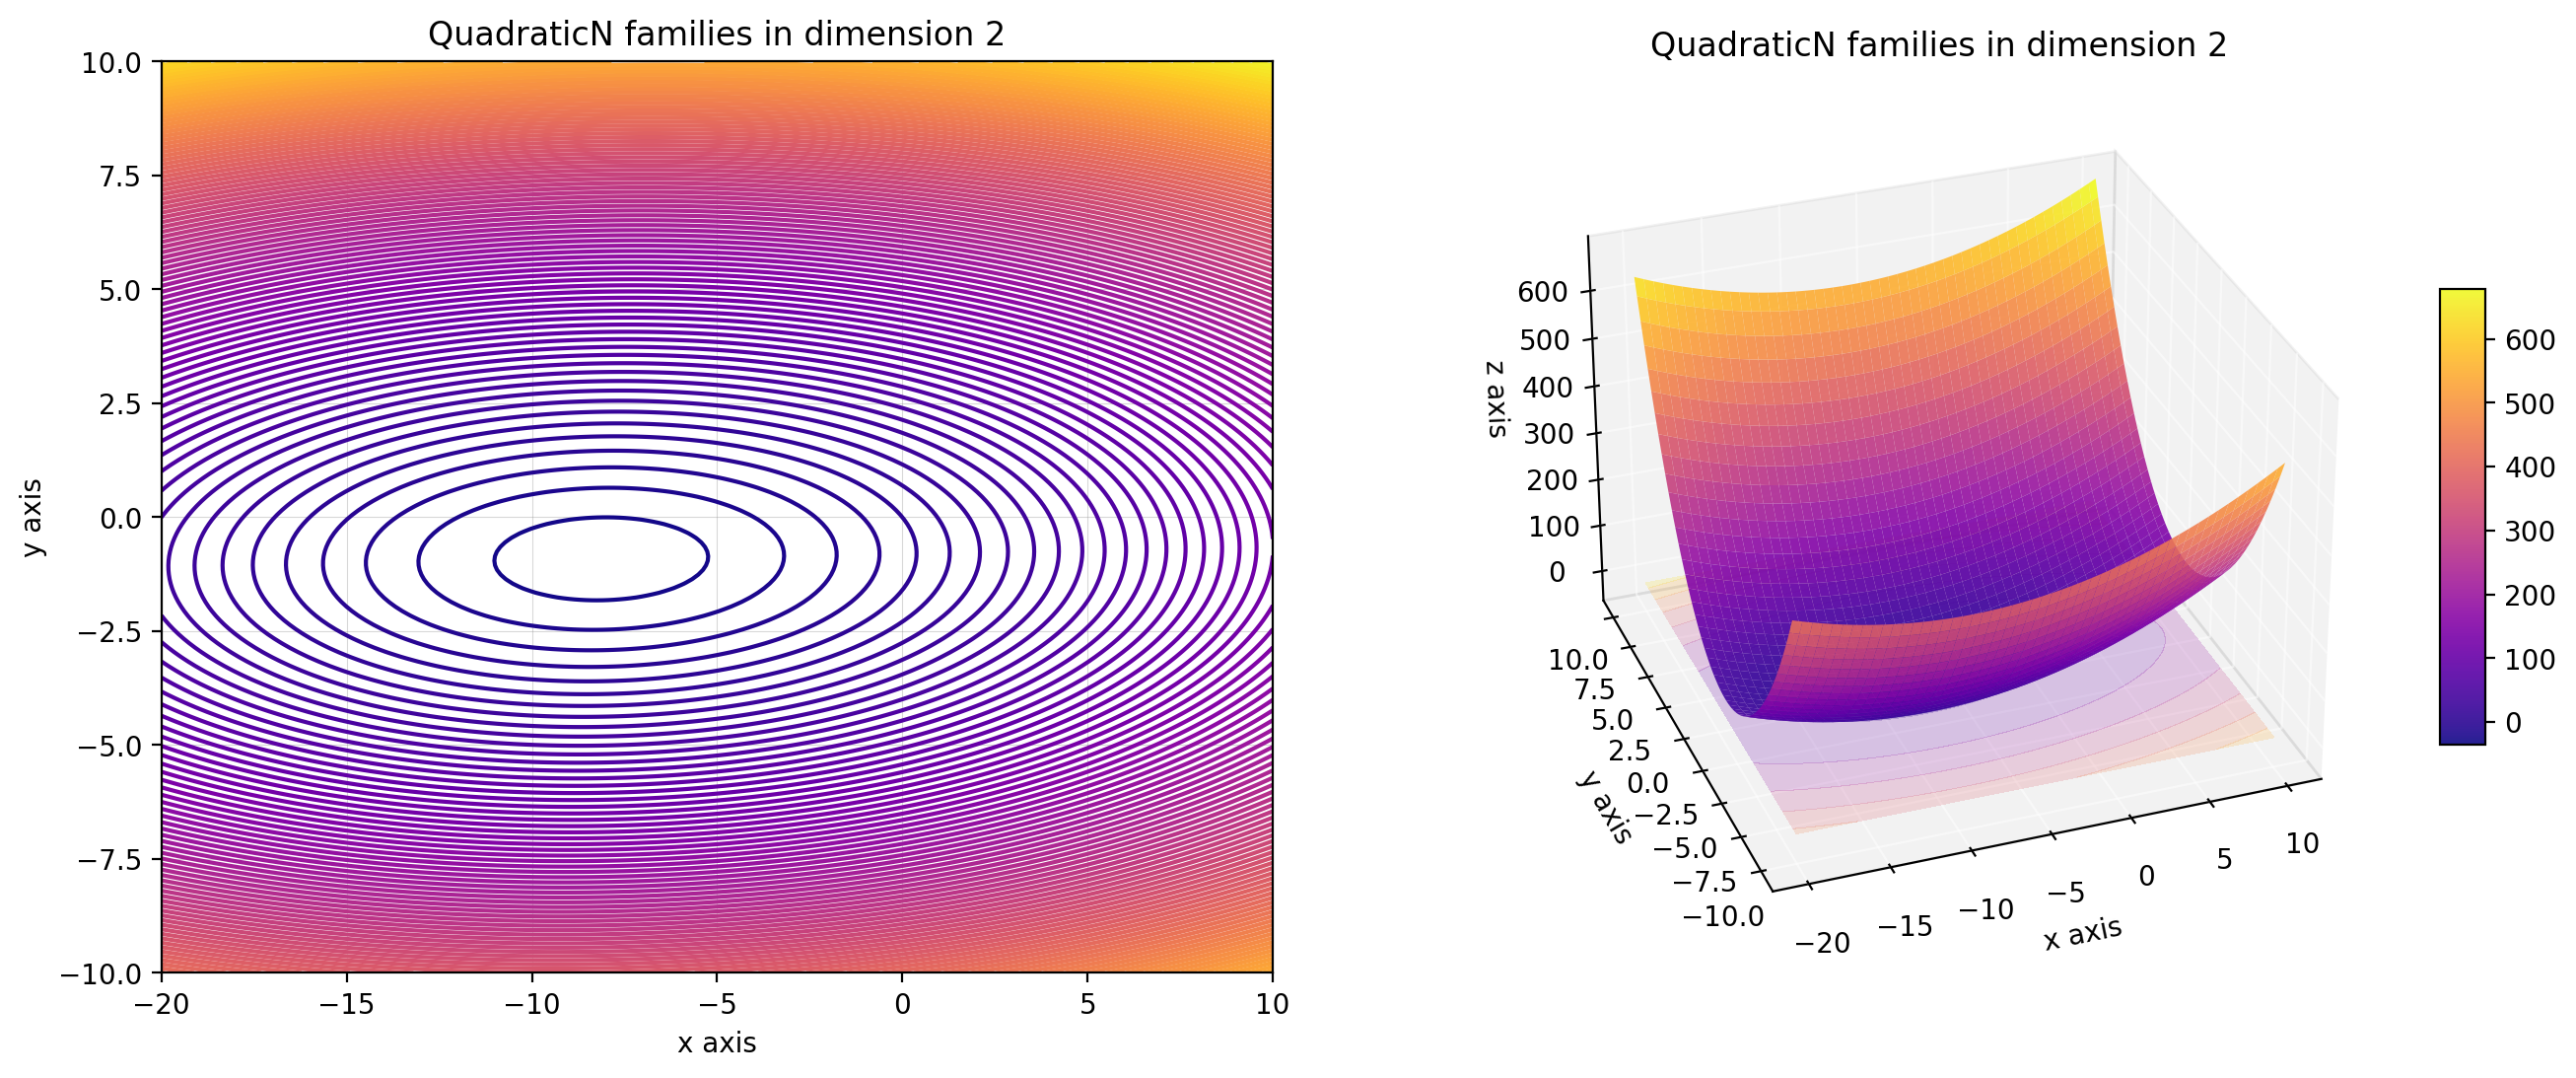

In [12]:
A, b = create_system(2)
x = np.linspace(-20, 10, 200) 
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
func_3d_params = {
    "X": X,
    "Y": Y,
    "A": A,
    "b": b
}
figu_3d_params = {
    "title": "QuadraticN families in dimension 2",
    "view": (30, 250)
}

quadratic_n = QuadraticN()
quadratic_n.figure_contour(func_3d_params, figu_3d_params)

In [15]:
class Rosenbrock(FunctionFigure):
    def function(self, x: np.array, gamma: float) -> np.array:
        return (x[0] - 1)**2 + gamma * (x[0]**2 - x[1])**2

    def plot_ax_contour(self, ax, parameters: Dict):
        X = parameters.get('X')
        Y = parameters.get('Y') 
        gamma = parameters.get('gamma')

        Z = self.function(np.stack((X, Y)), gamma)

        ax.contour(X, Y, Z, 100, cmap='plasma')

        return ax

    def plot_ax_3d(self, fig, ax, parameters: Dict):        
        X = parameters.get('X')
        Y = parameters.get('Y')
        gamma = parameters.get('gamma')

        Z = self.function(np.stack((X, Y)), gamma)

        image = ax.plot_surface(X, Y, Z, linestyles="solid", alpha=0.9, cmap='plasma')
        fig.colorbar(image, shrink=0.5, aspect=10, pad=0.05)

        ax.contourf(X, Y, Z, zdir='z', offset=-2.5, cmap='plasma', alpha=0.2)

        return fig, ax

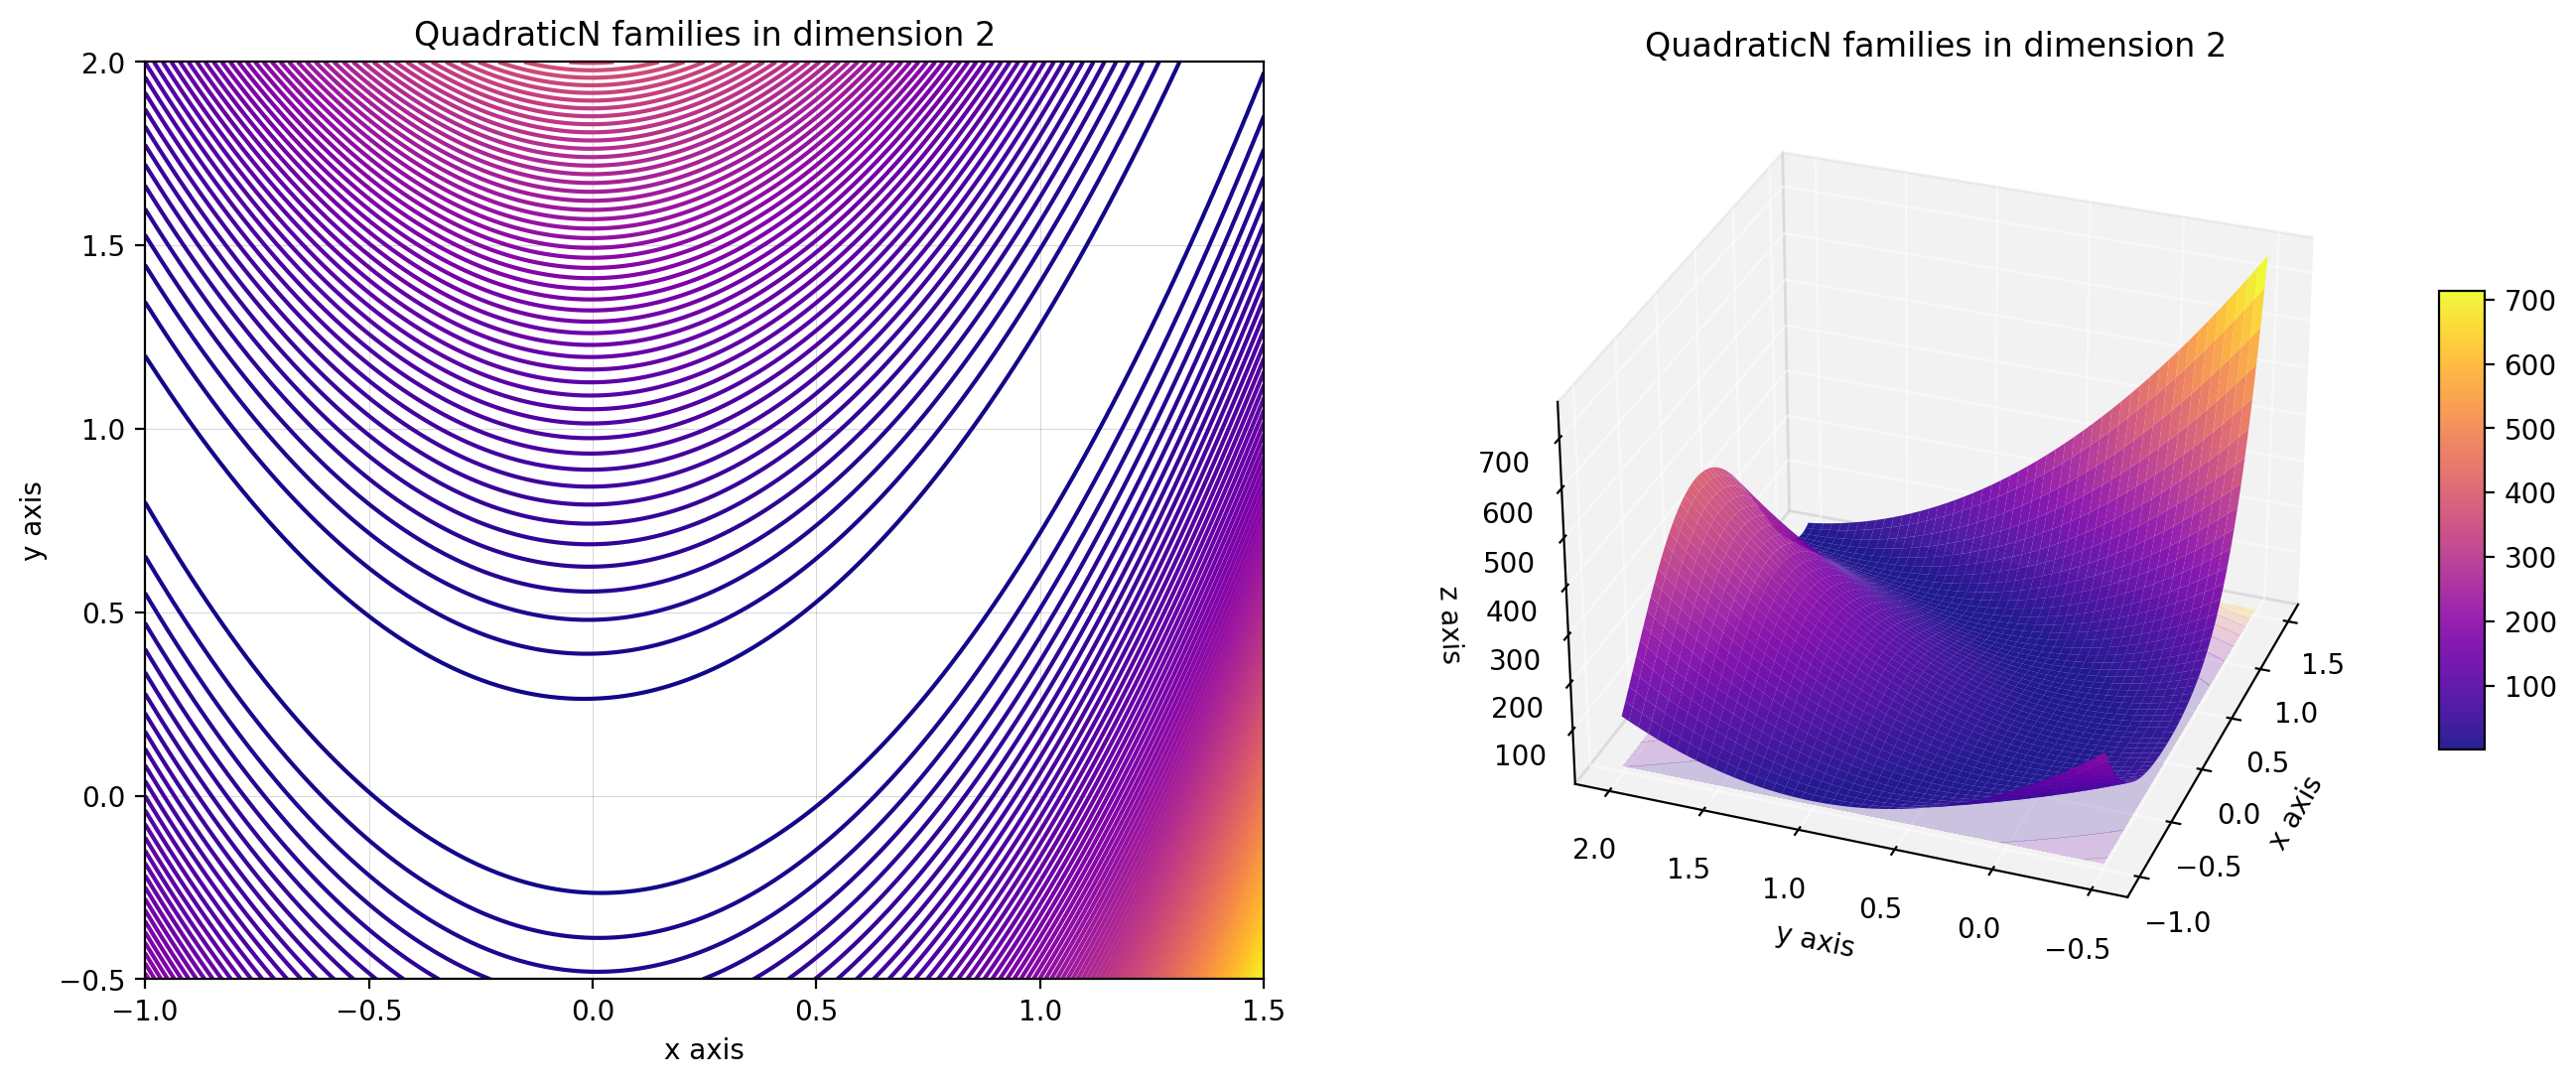

In [16]:
x = np.linspace(-1, 1.5, 200) 
y = np.linspace(-0.5, 2, 200)
X, Y = np.meshgrid(x, y)
func_3d_params = {
    "X": X,
    "Y": Y,
    "gamma": 100,
}
figu_3d_params = {
    "title": "QuadraticN families in dimension 2",
    "view": (30, 200)
}

rosenbrock = Rosenbrock()
rosenbrock.figure_contour(func_3d_params, figu_3d_params)

In [17]:
def partial(f, x: np.array, i: int = 0, dx: float = 1e-8) -> np.array:
    h = np.zeros(x.size)
    h[i] = dx
    
    return (f(x + h) - f(x - h)) / (2 * dx)

In [18]:
def compare_partial(f, df, x: np.array):
    y_partial = partial(f, x)
    y_true = df(x)
    
    print(f"{y_partial = }\n{y_true = }\n")

In [19]:
compare_partial(lambda x: np.exp(x), lambda x: np.exp(x), np.array([100]))
compare_partial(lambda x: x**3, lambda x: 3*x**2, np.array([100]))
compare_partial(lambda x: (3*np.sin(x) + x*np.cos(3*x)), lambda x: (3*np.cos(x) + np.cos(3*x) - 3*x*np.sin(3*x)), np.array([100]))

y_partial = array([2.68811544e+43])
y_true = array([2.68811714e+43])

y_partial = array([29999.98396263])
y_true = array([30000])

y_partial = array([302.49127998])
y_true = array([302.49161197])



In [20]:
def gradient(f, x: np.array, dx: float = 1e-8):
    return np.array([partial(f, x, i, dx) for i in range(x.shape[0])])

In [21]:
x = np.array([1, 10])
gradient(lambda x: x[0]**5 + x[1]**2, x)

array([ 4.9999997 , 20.00000165])

In [22]:
class QuadraticN2(FunctionFigure):
    def __init__(self, A: np.array, b: np.array):
        self.A = A
        self.b = b
        
    def function(self, x: np.array) -> np.array:
        return (x.T @ self.A @ x) / 2 - self.b.T @ x

    def plot_ax_contour(self, ax, parameters: Dict):
        X = parameters.get('X')
        Y = parameters.get('Y')     

        Z = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i,j] = self.function(np.array([X[i,j], Y[i,j]]))

        ax.contour(X, Y, Z, 100, cmap='plasma')

        return ax

    def plot_ax_3d(self, fig, ax, parameters: Dict):        
        X = parameters.get('X')
        Y = parameters.get('Y')      

        Z = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i,j] = self.function(np.array([X[i,j], Y[i,j]]))

        image = ax.plot_surface(X, Y, Z, linestyles="solid", alpha=0.9, cmap='plasma')
        fig.colorbar(image, shrink=0.5, aspect=10, pad=0.05)

        ax.contourf(X, Y, Z, zdir='z', offset=-2.5, cmap='plasma', alpha=0.2)

        return fig, ax

In [23]:
def desc_grad_const(f, pk, mu=0.001, eps=1E-6, max_iter=10000, detect_div=10e5, error=False):
    pk1 = pk - mu * gradient(f, pk)
    l = [pk]
    i = 0
    
    norm = np.linalg.norm(pk1 - pk, 2)
    
    while i < max_iter and (norm >= eps and norm <= detect_div):            
        pk, pk1 = pk1, pk1 - mu * gradient(f, pk1)
        norm = np.linalg.norm(pk1 - pk, 2)
        
        l.append(pk)
        i += 1
        

    if i == max_iter:
        print("ATTENTION (Grad const) : Le maximum d’itérations est atteint, la méthode n'a pas convergée.")
    
    if norm >= detect_div:
        print("ATTENTION (Grad const) : La méthode diverge, veuillez prendre un mu plus petit.")
        if error:
            return (norm, np.array(l))
        
    
    return np.array(l)

In [29]:
dim = 2
cond = 1000.
A, b = create_system(dim, cond)

quadratic_n2 = QuadraticN2(A, b)

x_exact = np.zeros(dim) + 1.
b = A @ x_exact

mu = 0.0001

x0 = np.zeros(dim)
x0 = np.array([5, -10])
res = desc_grad_const(quadratic_n2.function, x0, mu)

print (f"{mu}: Nb itérations", len(res))
print(f"{mu}: x_calculé",res[-1])
print()

print ("x_exact",x_exact)

ATTENTION (Grad const) : Le maximum d’itérations est atteint, la méthode n'a pas convergée.
0.0001: Nb itérations 10001
0.0001: x_calculé [-3.23057558 -0.01249709]

x_exact [1. 1.]


In [118]:
class QuadraticNDev(FunctionFigure):
    def __init__(self, A: np.array, b: np.array):
        self.A = A
        self.b = b
        
    def function(self, x: np.array) -> np.array:
        return (x.T @ self.A @ x) / 2 - self.b.T @ x


    def plot_ax_contour(self, ax, parameters: Dict, descent: Dict = {}):
        X = parameters.get('X')
        Y = parameters.get('Y')     

        Z = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i,j] = self.function(np.array([X[i,j], Y[i,j]]))

        ax.contour(X, Y, Z, 100, cmap='plasma', alpha=(1 if descent == {} else 0.5))

        if descent != {}:
            self.add_decent_2d_contour(ax, descent)

        return ax

    def plot_ax_3d(self, fig, ax, parameters: Dict, descent: Dict = {}):        
        X = parameters.get('X')
        Y = parameters.get('Y')

        Z = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                Z[i,j] = self.function(np.array([X[i,j], Y[i,j]]))

        image = ax.plot_surface(X, Y, Z, linestyles="solid", alpha=(1 if descent == {} else 0.3), cmap='plasma')
        fig.colorbar(image, shrink=0.5, aspect=10, pad=0.05)

        ax.contourf(X, Y, Z, zdir='z', offset=-2.5, cmap='plasma', alpha=(0.5 if descent == {} else 0.1))

        if descent != {}:
            self.add_descent_3d(ax, descent)

        return fig, ax

In [123]:
x02 = np.zeros(dim)
x02 = np.array([-10, 10])
res2 = desc_grad_const(quadratic_n2.function, x02, mu)

ATTENTION (Grad const) : Le maximum d’itérations est atteint, la méthode n'a pas convergée.


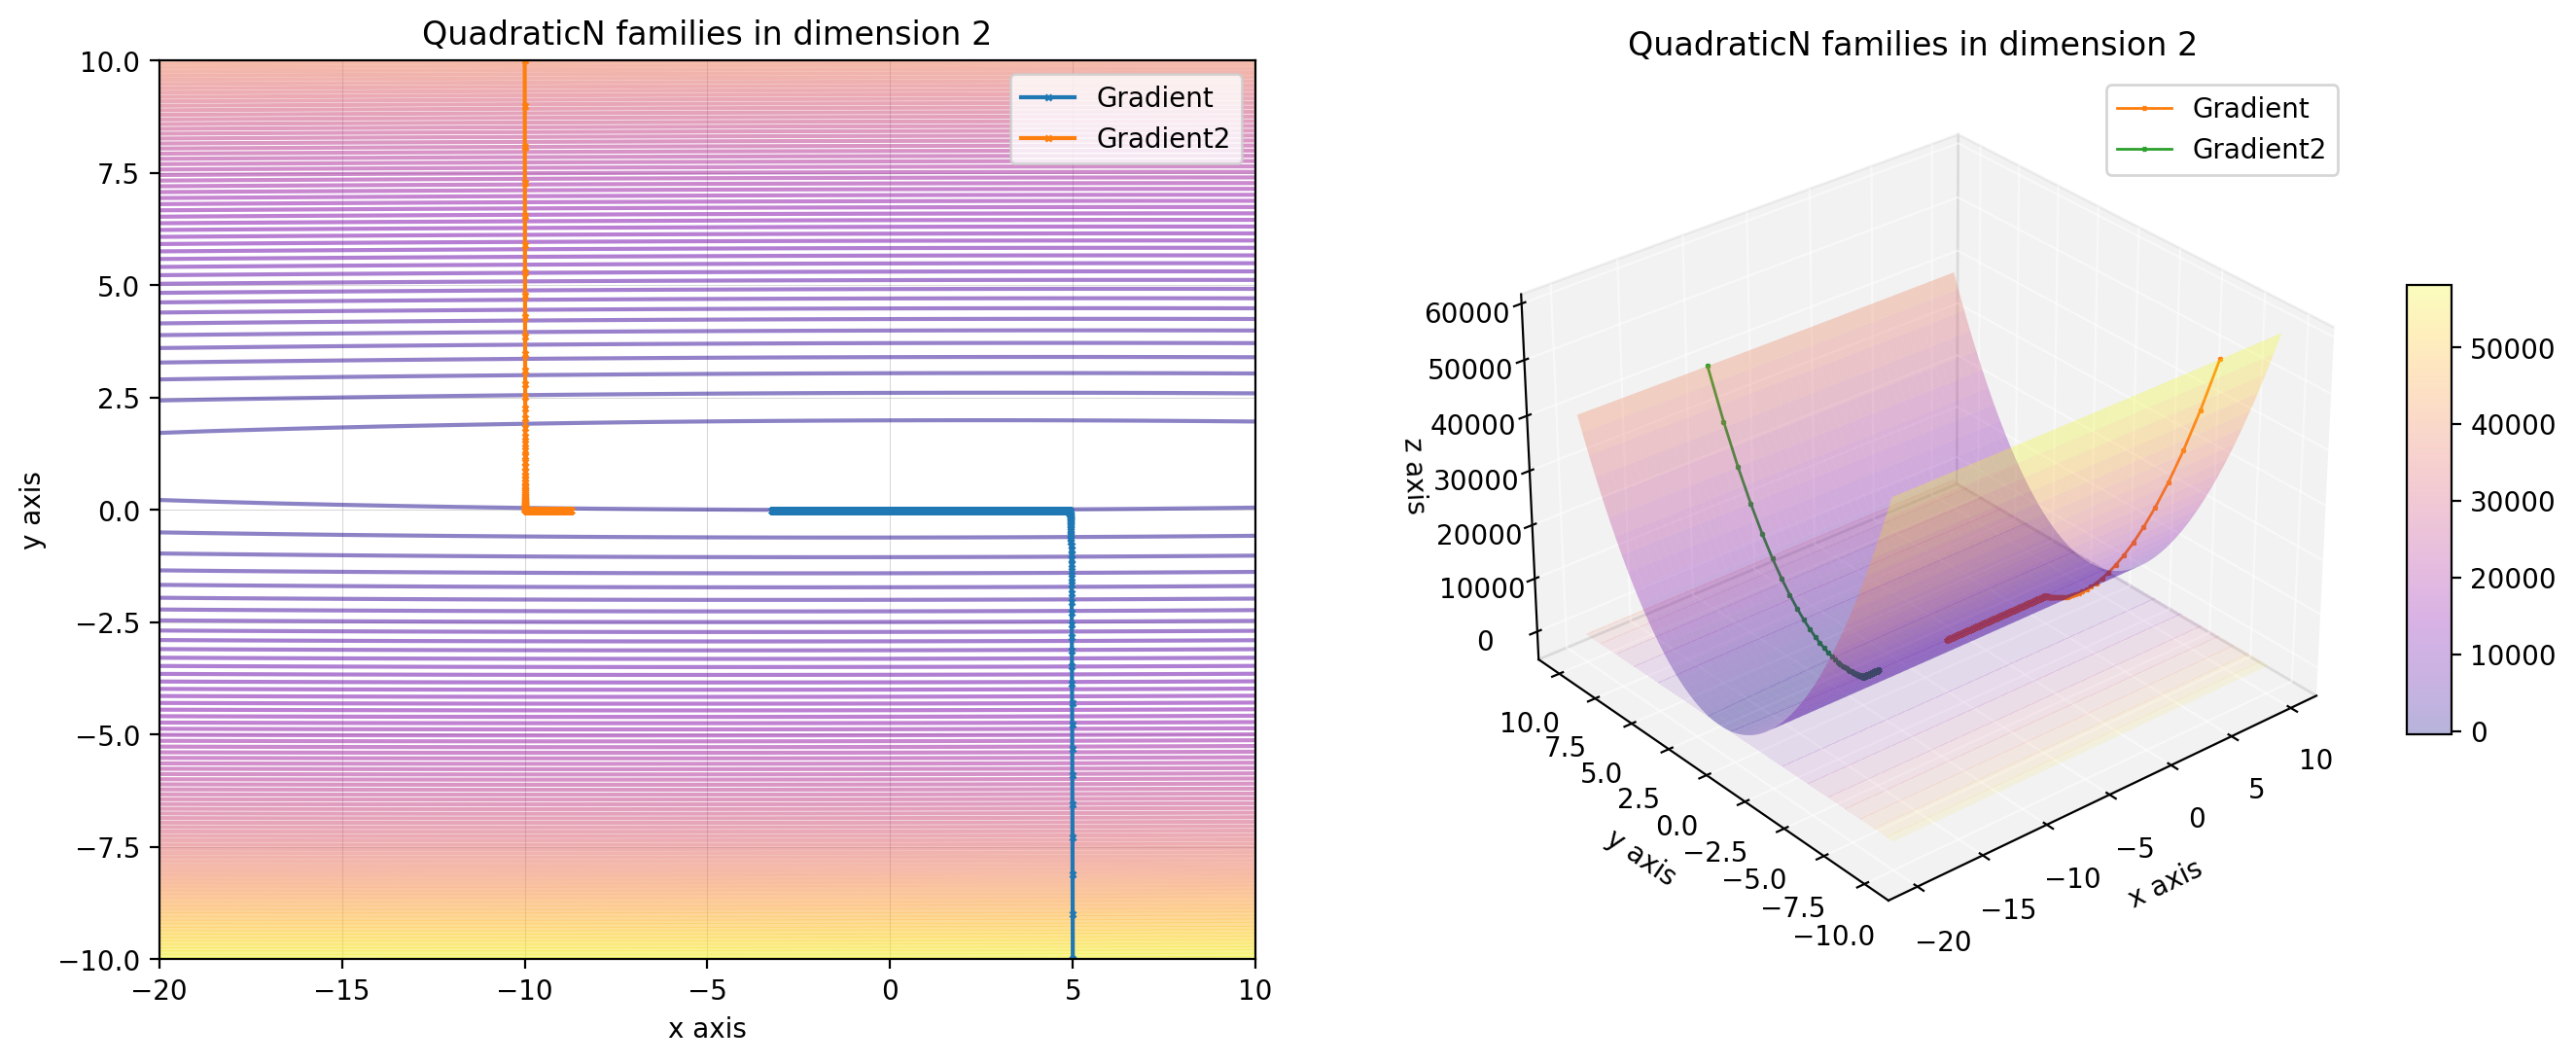

In [124]:
x = np.linspace(-20, 10, 200) 
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
func_3d_params = {
    "X": X,
    "Y": Y,
}
figu_3d_params = {
    "title": "QuadraticN families in dimension 2",
    "view": (30, 230),
    #"view": (0, 180),
}
descent = {
    "Gradient": res,
    "Gradient2": res2,
}

quadratic_dev = QuadraticNDev(A, b)
# quadratic_dev.figure_3d(func_3d_params, figu_3d_params, descent)
# quadratic_dev.contour_2d(func_3d_params, figu_3d_params, descent)
quadratic_dev.figure_contour(func_3d_params, figu_3d_params, descent)

In [167]:
class GradientDescent:
    def __name__(self) -> str:
        return self.__class__.__name__
        
    def _check_max_iter(self, i: int, max_iter: int):
        if i >= max_iter:
            print(f"{self.__name__()}: Max iteration reached: {max_iter}, the method did not converged")

    def _check_norm(self, norm: float, detect_div: float):
        self.last_norm = norm

        if norm >= detect_div:
            print(f"{self.__name__()}: The methode diverged. Take a smaller mu.")

    def _set_report(self, cost: float, it: int):
        self.last_cost = cost
        self.last_nb_it = it
            
    def __init__(self):
        self.last_norm = None
        self.last_cost = None
        self.last_nb_it = None
        
    def partial(self, f, x: np.array, i: int = 0, dx: float = 1e-8) -> np.array:
        h = np.zeros(x.size)
        h[i] = dx
        
        return (f(x + h) - f(x - h)) / (2 * dx)
    
    def gradient(self, f, x: np.array, dx: float = 1e-8):
        return np.array([partial(f, x, i, dx) for i in range(x.shape[0])])

    def get_report(self):
        print(f"{self.__name__()}: Number of iterations: {self.last_nb_it} | Last Cost: {self.last_cost}")

In [168]:
class GradientDescentConstant(GradientDescent):
    def __name__(self):
        return f"{self.__class__.__name__}({self.__last_mu})"
        
    def __call__(self, f, pk, mu=0.001, eps=1E-6, max_iter=10000, detect_div=10e5):
        self.__last_mu = mu
        
        pk1 = pk - mu * self.gradient(f, pk)
        l = [pk]
        i = 0
        
        norm = np.linalg.norm(pk1 - pk, 2)
        
        while i < max_iter and (norm >= eps and norm <= detect_div):            
            pk, pk1 = pk1, pk1 - mu * self.gradient(f, pk1)
            norm = np.linalg.norm(pk1 - pk, 2)
            
            l.append(pk)
            i += 1

        l = np.array(l)
        
        self._check_max_iter(i, max_iter)
        self._check_norm(norm, detect_div)
        self._set_report(f(l[-1]), i)
        
        return l

In [169]:
dim = 10
A, b = create_system(dim, 1000.)
x_exact = np.array([1.] * dim)
b = A @ x_exact

quadratic_deev = QuadraticNDev(A, b)
dgc = GradientDescentConstant()
x0 = np.zeros(dim)

for mu in [0.9 / cond, 0.1, 0.01, 0.001, 10**(-4), 10**(-5)]:
    res = dgc(quadratic_deev.function, x0, mu)
    dgc.get_report()

GradientDescentConstant(0.0009): Number of iterations: 8064 | Last Cost: -2115.119593686133
GradientDescentConstant(0.1): The methode diverged. Take a smaller mu.
GradientDescentConstant(0.1): Number of iterations: 2 | Last Cost: 101909887676.09703
GradientDescentConstant(0.01): The methode diverged. Take a smaller mu.
GradientDescentConstant(0.01): Number of iterations: 5 | Last Cost: 5408702363559.723
GradientDescentConstant(0.001): Number of iterations: 7352 | Last Cost: -2115.119593801274
GradientDescentConstant(0.0001): Max iteration reached: 10000, the method did not converged
GradientDescentConstant(0.0001): Number of iterations: 10000 | Last Cost: -2115.050119845958
GradientDescentConstant(1e-05): Max iteration reached: 10000, the method did not converged
GradientDescentConstant(1e-05): Number of iterations: 10000 | Last Cost: -2114.742843343667
